In [1]:
import pandas as pd
import numpy as np

# 索引參照屬性
- df.**at**: 使用 index (key) 和 columns **名稱** 來「取得或設定」單一元素內容或陣列內容。
- df.**iat**: 使用 index (key) 和 columns **編號** 來「取得或設定」單一元素內容。
- df.**loc**: 使用 index (key) 或 columns **名稱** 來「取得或設定」整個 row 或 columns 的資料或陣列內容。
- df.**iloc**: 使用 index (key) 或 columns **編號** 來「取得或設定」整個 row 或 columns 的資料。

In [2]:
'''建立「2020 ~ 2023」年「臺北、臺中、高雄」某月平均溫度 的 dataframe'''

# 自訂索引
years = range(2020, 2024)

# 臺北、臺中、高雄 某個月的平均溫度
taipei = pd.Series([20, 21, 19, 21], index=years)
taichung = pd.Series([25, 26, 27, 28], index=years)
kaohsiung = pd.Series([30, 29, 31, 32], index=years)

# 建立 dataframe (axis=0 是上下合併，axis=1 是左右合併)
df = pd.concat([taipei, taichung, kaohsiung], axis=1)

# 設定欄位
df.columns = ['taipei', 'taichung', 'kaohsiung']; df

,taipei,taichung,kaohsiung
2020,20,25,30
2021,21,26,29
2022,19,27,31
2023,21,28,32


In [3]:
# 使用 at: 取得 row 是 2020 且 column 是 taipei 的值
df.at[2020, 'taipei']

20

In [4]:
# 使用 at: 取得 row 是 2023 且 column 是 kaohsiung 的值
df.at[2023, 'kaohsiung']

32

In [5]:
# 使用 iat: 取得 row 是 2, column 是 1 的值
'''
index 是 zero-based
'''
df.iat[2, 1]

27

In [6]:
# 使用 loc: 取得 row 是 2021 的資料
'''
只有指定 2021，所以回傳 series 型態
'''
df.loc[2021]

taipei       21
taichung     26
kaohsiung    29
Name: 2021, dtype: int64

In [7]:
# 使用 loc: 取得 row 是 2020 和 2023 的資料
'''
指定兩個 row，資料將自帶 column，回傳 dataframe
'''
df.loc[ [2020, 2023] ]

,taipei,taichung,kaohsiung
2020,20,25,30
2023,21,28,32


In [8]:
# 使用 loc: 取得 row 是 2021 到 2023、column 是 taichung 到 kaohsiung 的資料
'''
沒有 slicing 有關 end 需要減 1 的問題
'''
df.loc[2021:2023, "taichung":"kaohsiung"]

,taichung,kaohsiung
2021,26,29
2022,27,31
2023,28,32


In [9]:
# 使用 iloc: 取得 row 是 0 的資料
'''
只有指定 [0]，所以回傳 series
'''
df.iloc[0]

taipei       20
taichung     25
kaohsiung    30
Name: 2020, dtype: int64

# 直接索引
不用使用 df.at\[\]、df.loc\[\] 等方式取得資料，直接使用 `df[index 或 key]`，來取得對應的行或列的資料。

In [10]:
# 取得 column 為 taipei 的資料
df['taipei']

2020    20
2021    21
2022    19
2023    21
Name: taipei, dtype: int64

In [11]:
# 取得 column 是 taipei、row 是 2022 的資料
df['taipei'][2022]

19

In [12]:
# 取得 column 是 taipei 和 taichung 的資料
df[ ['taipei', 'taichung'] ]

,taipei,taichung
2020,20,25
2021,21,26
2022,19,27
2023,21,28


In [13]:
# 取得 row 索引編號 1 ~ 2 的資料
'''
透過 slicing 方式取得資料
'''
df[1:3]

,taipei,taichung,kaohsiung
2021,21,26,29
2022,19,27,31


In [14]:
# 取得 row 索引編號 3 之前的資料
'''
透過 slicing 方式取得資料
'''
df[:3]

,taipei,taichung,kaohsiung
2020,20,25,30
2021,21,26,29
2022,19,27,31


In [15]:
# 取得 taipei 溫度大於 20 的資料
'''
類似在 df 的 taipei 欄位當中，
將每一個值進行邏輯判斷，
符合條件的整筆資料，
才隨同 df 回傳回來
'''
df[ df['taipei'] > 20 ]

,taipei,taichung,kaohsiung
2021,21,26,29
2023,21,28,32


In [16]:
# 取得 taipei 溫度大於 20、高雄溫度大於 30 的資料
'''
多個判斷語法，要用括號包起來

&: and
|: or
'''
df[ (df['taipei'] > 20) & (df['kaohsiung'] > 30) ]

,taipei,taichung,kaohsiung
2023,21,28,32


# NaN 的處理
- df.**dropna()**: 將 NaN `刪除`，再回傳新的 series 或 dataframe 物件。
- df.**fillna()**: 將 NaN 由特定的 value `取代`，再回傳新的 series 或 dataframe 物件。
- df.**isna()**: 判斷是否為 NaN，如果`是`，就回傳 True，如果不是，就回傳 False。
- df.**isnull()**: 跟 df.**isna()** 一樣。

In [17]:
# 初始化
df = pd.DataFrame([
    [1, 2, 3],
    [4, np.nan, 6],
    [7, 8, np.nan]
]); df

,0,1,2
0,1,2.0,3.0
1,4,NaN,6.0
2,7,8.0,NaN


In [18]:
# isna(): 判斷是否為 NaN，如果是，就回傳 True，如果不是，就回傳 False。
'''
isna() 和 isnull() 是一樣的效果，
主要原因是因為 pandas 的 dataframe 概念，
是基於 R 的 dataframe，
在 R 裡面，na 和 null 是不一樣的東西，
而 pandas 是基於 numpy，
numpy 沒有 na 也沒有 null，只有 nan，
所以 pandas
'''
df.isna()

,0,1,2
0,False,False,False
1,False,True,False
2,False,False,True


In [19]:
# 在 NaN 的位置上，補上 0
df_ = df.fillna(0); df_.astype('int32')

,0,1,2
0,1,2,3
1,4,0,6
2,7,8,0


In [20]:
# dropna(): 刪除含 NaN 的 row (預設)
df_ = df.dropna(); df_

,0,1,2
0,1,2.0,3.0


In [21]:
# dropna(axis=1): 刪除含 NaN 的 column
df_ = df.dropna(axis=1); df_

,0
0,1
1,4
2,7


# 簡單的統計函數
- **max**(axis=None): 回傳指定軸的最大值。
- **min**(axis=None): 回傳指定軸的最小值。
- **sum**(axis=None): 回傳指定軸的總和。
- **mean**(axis=None): 回傳指定軸的平均數。
- **median**(axis=None): 回傳指定軸的中位數。
- **std**(axis=None): 回傳指定軸的標準差。

In [22]:
# 初始化
from random import randint

# dataframe 的 columns
courses = ['國文', '英文', '數學', '自然', '社會', '其它']

# 5 個學生的各科分數 (隨機產生)
s1 = [randint(60, 100) for x in range(6)]
s2 = [randint(60, 100) for x in range(6)]
s3 = [randint(60, 100) for x in range(6)]
s4 = [randint(60, 100) for x in range(6)]
s5 = [randint(60, 100) for x in range(6)]

grades = [
    s1, # 代表 s1 學生的 5 科成績
    s2, # 代表 s2 學生的 5 科成績
    s3, # 代表 s3 學生的 5 科成績
    s4, # 代表 s4 學生的 5 科成績
    s5  # 代表 s5 學生的 5 科成績
]

# 建立 dataframe
df = pd.DataFrame(
    grades,
    columns=courses,
    index=range(1,6)
); df

,國文,英文,數學,自然,社會,其它
1,88,68,100,81,92,78
2,85,69,60,72,65,94
3,66,76,75,74,61,87
4,90,66,61,79,80,83
5,85,83,97,62,65,85


In [23]:
# 補充: 刪除 column 的資料
'''
也可以刪除多個 columns:
df = df.drop(columns=['column_nameA', 'column_nameB'])
'''
df = df.drop('其它', axis=1); df

,國文,英文,數學,自然,社會
1,88,68,100,81,92
2,85,69,60,72,65
3,66,76,75,74,61
4,90,66,61,79,80
5,85,83,97,62,65


In [24]:
# 列出每一個學生的總分，另外新增一個欄位來放置它
total = [df.iloc[i].sum() for i in range(0, 5)]
df['總分'] = total; df

,國文,英文,數學,自然,社會,總分
1,88,68,100,81,92,429
2,85,69,60,72,65,351
3,66,76,75,74,61,352
4,90,66,61,79,80,376
5,85,83,97,62,65,392


In [25]:
# 列出各科平均分數 (包括總分的平均分數)
'''
df 的平均預設由上而下
df.mean(axis=0)
'''
avg = df.mean(); avg

國文     82.8
英文     72.4
數學     78.6
自然     73.6
社會     72.6
總分    380.0
dtype: float64

In [26]:
# 增加 index: 在 df 下方增加平均分數
df.loc['平均分數'] = avg; df

,國文,英文,數學,自然,社會,總分
1,88.0,68.0,100.0,81.0,92.0,429.0
2,85.0,69.0,60.0,72.0,65.0,351.0
3,66.0,76.0,75.0,74.0,61.0,352.0
4,90.0,66.0,61.0,79.0,80.0,376.0
5,85.0,83.0,97.0,62.0,65.0,392.0
平均分數,82.8,72.4,78.6,73.6,72.6,380.0


In [27]:
# 刪除 index: 刪除 平均分數 的 row
'''
也可以這樣寫:
df = df.drop(index=['平均分數'])
'''
df = df.drop('平均分數', axis=0); df

,國文,英文,數學,自然,社會,總分
1,88.0,68.0,100.0,81.0,92.0,429.0
2,85.0,69.0,60.0,72.0,65.0,351.0
3,66.0,76.0,75.0,74.0,61.0,352.0
4,90.0,66.0,61.0,79.0,80.0,376.0
5,85.0,83.0,97.0,62.0,65.0,392.0


In [28]:
# 排序: 將 dataframe 物件的 總分 欄位，從大排到小
df = df.sort_values(by='總分', ascending=False); df

,國文,英文,數學,自然,社會,總分
1,88.0,68.0,100.0,81.0,92.0,429.0
5,85.0,83.0,97.0,62.0,65.0,392.0
4,90.0,66.0,61.0,79.0,80.0,376.0
3,66.0,76.0,75.0,74.0,61.0,352.0
2,85.0,69.0,60.0,72.0,65.0,351.0


In [29]:
# 經過大到小的排序後，增加名次欄位
rank = range(1, 6)
df['名次'] = rank; df

,國文,英文,數學,自然,社會,總分,名次
1,88.0,68.0,100.0,81.0,92.0,429.0,1
5,85.0,83.0,97.0,62.0,65.0,392.0,2
4,90.0,66.0,61.0,79.0,80.0,376.0,3
3,66.0,76.0,75.0,74.0,61.0,352.0,4
2,85.0,69.0,60.0,72.0,65.0,351.0,5


In [30]:
# 依 index 從新排序
df = df.sort_index(ascending=True); df

,國文,英文,數學,自然,社會,總分,名次
1,88.0,68.0,100.0,81.0,92.0,429.0,1
2,85.0,69.0,60.0,72.0,65.0,351.0,5
3,66.0,76.0,75.0,74.0,61.0,352.0,4
4,90.0,66.0,61.0,79.0,80.0,376.0,3
5,85.0,83.0,97.0,62.0,65.0,392.0,2


# 案例補充：取得 Wep API 資料 (json)，讀入 pandas 建立 dataframe
- 資料來源: [Cafe Nomad：咖啡廳遊牧民族](https://cafenomad.tw/)
  - Web API: [API v1.2](https://cafenomad.tw/developers/docs/v1.2)
- Pandas 官方文件: [https://pandas.pydata.org/docs/reference/index.html](https://pandas.pydata.org/docs/reference/index.html)
  - cheatsheet: [with pandas Cheat Sheet http://pandas.pydata.org](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

In [ ]:
'''安裝 requests 套件: 對網頁伺服器發出請求與取得回應的工具'''
!pip install requests pandas matplotlib

In [31]:
# 匯入套件
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# 讓 matplotlic 支援中文字型
matplotlib.rc('font', family='Microsoft JhengHei')

In [32]:
'''
取得 json 資料

臺北咖啡廳資訊 Web API:
https://cafenomad.tw/api/v1.2/cafes/taipei
'''
# 發出請求，取得回應
response = requests.get(url="https://cafenomad.tw/api/v1.2/cafes/taipei")

# 將回應內容以 json 格式 (將 json 字串轉成 dict 或 list) 回傳
data = response.json()

In [33]:
'''建立 dataframe'''
df = pd.DataFrame(data); df

,id,name,city,wifi,seat,quiet,tasty,cheap,music,url,address,latitude,longitude,limited_time,socket,standing_desk,mrt,open_time
0,000703fe-cf8a-43c8-bd83-c90cfd61915f,蜂巢咖啡,taipei,0.0,4.5,3.0,5.0,4.0,4.0,https://www.facebook.com/honeycombcafe2016/,新北市永和區永貞路214號,25.00409680,121.51528650,no,no,yes,永安市場站,雙週四公休，有變更另外公告
1,0022fc3b-598f-4bb5-bb69-1b7d1b9b5202,(暫停營業) The Kaffa Lovers,taipei,5.0,5.0,5.0,5.0,4.0,5.0,https://www.facebook.com/thekaffalovers/?fref=ts,台北市中正區金山北路3號,25.04435400,121.53045590,no,maybe,yes,忠孝新生,週二至週五 10:00-19:00 六日09:00-19:00
2,005a5ee9-7460-4f8a-b965-8b9565ee1e4e,一杯咖啡士林店,taipei,0.0,0.0,0.0,0.0,0.0,0.0,https://www.facebook.com/acupofcoffeeshilin/,台北市士林區中山北路五段505巷36號,25.09302050,121.52667780,no,yes,yes,,
3,00971781-cad6-4a6f-8a38-b597d8a1488b,Full of Beans 充滿豆豆咖啡館,taipei,0.0,0.0,0.0,0.0,0.0,0.0,https://www.facebook.com/FOBcafe.gallery/,台北市中山區龍江路21巷9-6號,25.04783800,121.54113810,,,,,
4,00b6ce2b-d92e-44e5-b1cb-daaa925a5135,良食究好市集餐廳WONMI,taipei,5.0,3.0,3.0,5.0,0.0,5.0,http://www.wonmi.com.tw/home.php,台北市八德路四段138號 (京華城 Living Mall 10 F),25.04835450,121.56230040,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648,ff53abc4-7a89-43db-8d0b-43e5b00dff5f,喜穗咖啡蘭花生活館（永久停業）,taipei,0.0,0.0,0.0,0.0,0.0,0.0,,242新北市新莊區中原東路206號,25.05447010,121.46051500,,maybe,no,,
1649,ff582eb9-3f83-4f65-98b2-c38a4ef511db,自然產,taipei,3.0,5.0,4.0,4.0,3.0,3.0,https://www.facebook.com/greenday209/,新北市板橋區重慶路209號,25.00157470,121.46294660,maybe,yes,no,,
1650,ff973c43-9474-46dc-bb24-0d1947143ba1,金獅取水,taipei,0.0,0.0,0.0,0.0,0.0,0.0,https://www.facebook.com/goldenlionkafe,台北市中山區民生東路2段151號,25.05815610,121.53540250,maybe,yes,yes,,
1651,ffd780fe-9d33-4a4b-90dd-74d7d9de31f7,The Tuckaway Taipei,taipei,5.0,5.0,5.0,5.0,5.0,4.0,IG FB tuckawaytaipei,台北市文山區木柵路三段48巷1弄6號1樓,24.98797900,121.56523300,no,maybe,no,,


In [34]:
'''dataframe 的詳細資料'''
df_detail = df.describe(); df_detail


# 問題: 下面兩行程式碼差異?
# df_detail.loc['25%', ['wifi']] => 回傳 Series，可以使用 .index 和 .values
# df_detail.loc['25%', 'wifi']  => 類似 df.at()，取得特定 cell 的值

,wifi,seat,quiet,tasty,cheap,music
count,1653.000000,1653.000000,1653.000000,1653.000000,1653.000000,1653.000000
mean,2.879673,3.018754,2.830792,3.127344,2.785239,3.006957
std,2.267826,2.012434,1.920887,2.070042,1.891145,2.034906
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,3.500000,4.000000,3.500000,4.000000
75%,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [35]:
'''了解指定 column 每個值的數量'''
df.value_counts('limited_time')

limited_time
no       714
         629
maybe    278
yes       32
Name: count, dtype: int64

In [36]:
'''它的型別'''
type(df.value_counts('limited_time'))

pandas.core.series.Series

In [37]:
'''取得 series 的 index'''
df.value_counts('limited_time').index

Index(['no', '', 'maybe', 'yes'], dtype='object', name='limited_time')

In [38]:
'''
將上面的空字元，改成其它文字

df.loc[row:column]
row 的地方，也可以改成條件判斷
'''
df.loc[df['limited_time'] == '', 'limited_time'] = 'undefined'

In [39]:
'''再檢視'''
df.value_counts('limited_time').index

Index(['no', 'undefined', 'maybe', 'yes'], dtype='object', name='limited_time')

In [40]:
'''取得 series 的 values'''
df.value_counts('limited_time').values

array([714, 629, 278,  32], dtype=int64)

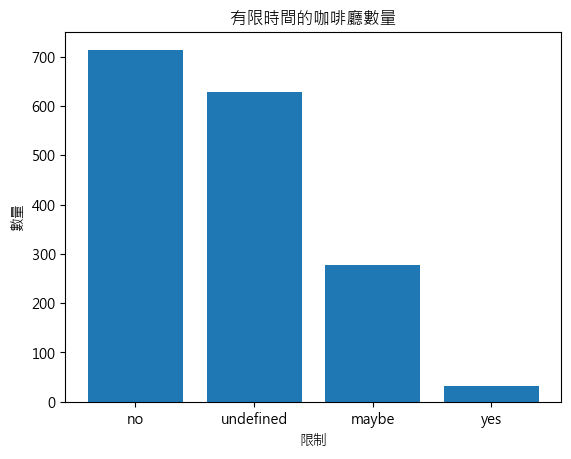

In [41]:
'''
畫個圖吧


參考連結:
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
'''
plt.bar(
    df.value_counts('limited_time').index, 
    df.value_counts('limited_time').values
)
plt.title("有限時間的咖啡廳數量")
plt.xlabel("限制")
plt.ylabel("數量")
plt.show()

---
# 字串搜尋與條件判斷

In [42]:
'''取得 臺北市信義區 的資料'''
df[ df['address'].str.contains("臺北市大安區", case=False) ]

,id,name,city,wifi,seat,quiet,tasty,cheap,music,url,address,latitude,longitude,limited_time,socket,standing_desk,mrt,open_time
305,2e98e587-7ea8-4544-8137-a00798c4027c,C25度咖啡館,taipei,0.0,0.0,4.0,0.0,3.0,5.0,https://www.facebook.com/c25cafe/,臺北市大安區安和路一段21巷23號1F,25.03950190,121.55152820,no,maybe,,,
824,7d902454-c657-443b-8c01-6b73021b76ff,BeansLab coffee 豆研咖啡館,taipei,5.0,5.0,5.0,5.0,5.0,5.0,http://www.facebook.com/beanslabcoffee,臺北市大安區辛亥路二段171巷6弄6號,25.02190620,121.54085540,undefined,maybe,yes,科技大樓捷運站,
1061,a36d3002-1ead-40ee-9747-70b760ae9dc3,學校咖啡館EcoleCafe',taipei,4.0,3.0,3.0,4.0,3.0,4.0,https://www.facebook.com/ecolecafe.cafetrouve/,臺北市大安區青田街1巷6號,25.02891190,121.53217200,no,yes,yes,"東門站5號出口步8分/公車站''金華國中""步2分, ""金華新生路口""""溫州街口""步5分/Yo...",
1331,d0173b58-c0ae-4210-8c0f-6971c1010fb7,Louisa Coffee 路易莎咖啡(師大直營店),taipei,4.5,3.0,2.0,4.0,5.0,4.0,,臺北市大安區和平東路一段79號,25.02705990,121.52531890,undefined,maybe,no,,


In [43]:
'''取得在「臺北市」，且「插座很多」、「不限時間」、「便宜程度 4 以上」的資料'''
df[ 
    df['address'].str.contains('台北市') & 
    (df['socket'] == 'yes') & 
    (df['limited_time'] == 'no') &
    (df['cheap'] >= 4)
]

,id,name,city,wifi,seat,quiet,tasty,cheap,music,url,address,latitude,longitude,limited_time,socket,standing_desk,mrt,open_time
26,02ab54d1-2792-41bb-a532-cdeb36cc2233,Pure Caf'e,taipei,5.0,5.0,5.0,5.0,5.0,5.0,https://www.facebook.com/purecaf,台北市中山區北安路595巷19弄2號,25.08242060,121.54757010,no,yes,no,大直捷運站,
43,05dd1faa-3c45-4595-86ca-a255291c37f4,The Misanthrope Society 厭世會社,taipei,5.0,5.0,5.0,5.0,5.0,5.0,http://facebook.com/mis.society,台北市中正區羅斯福路四段40巷1-2號一樓,25.01511800,121.53328700,no,yes,yes,公館站,
45,06c2c234-719e-44a2-b4b7-6029e52bdaf7,未央咖啡店,taipei,5.0,4.0,4.0,5.0,4.0,5.0,https://www.facebook.com/BCmidnightcafe/,台北市大安區四維路208巷10號,25.02625800,121.54741500,no,yes,no,"科技大樓站步7分/公車站""鳳雛公園""步1分, ""臥龍街""步3分/YouBike""成功國宅""站步1分",
58,085927d6-6035-4653-80d7-a936eecbe8cf,Sunday Morning 星期天早上,taipei,5.0,5.0,4.0,5.0,5.0,5.0,https://m.facebook.com/sunteabar/?ref=bookmarks,台北市大安區樂業街70號,25.02206800,121.55058060,no,yes,yes,,不定期公休於粉絲專頁公佈
73,0a2ebcd9-57a8-4ae6-8cff-c6634bf5b5eb,Balcony 陽台 Café,taipei,4.0,3.0,4.5,4.0,4.0,4.0,https://www.facebook.com/balconycafe2F/,台北市中山區大直街34巷20號2F,25.08158900,121.54560800,no,yes,no,大直,11:00 - 22:00 週一公休
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556,f1062152-cfce-443a-b6e1-e6e322703523,Coffee Woodrow 伍拙咖啡,taipei,5.0,5.0,4.0,5.0,5.0,4.0,https://www.facebook.com/Coffee-Woodrow-690879...,台北市信義區崇德街10號,25.02425110,121.55327820,no,yes,yes,,10:30am - 8:30pm
1567,f39682b3-c381-4925-8784-b2ef0c10eace,賦茶,taipei,5.0,4.0,4.0,5.0,4.0,4.0,https://www.facebook.com/pg/chanteaz/,台北市大安區光復南路322號,25.03863950,121.55685020,no,yes,yes,,
1575,f4e72c02-4cc6-4606-af53-975bf4c3ef2d,PearNature 梨本咖啡,taipei,5.0,5.0,5.0,5.0,5.0,5.0,bar.pearnature.com,台北市大安區安居街34巷6號1樓,25.02078890,121.55419820,no,yes,no,六張犁,全年無休
1579,f5daf234-051c-4bb9-8f6c-bd119a36b71d,citilite coffee & roasters,taipei,5.0,4.0,4.5,5.0,4.0,4.5,https://www.facebook.com/FloatingCotton/,台北市中山區合江街41巷16號,25.05567260,121.54023860,no,yes,yes,,


In [44]:
'''取得緯度 (latitude)、經度 (longitude)'''
df[ ['latitude', 'longitude'] ]

,latitude,longitude
0,25.00409680,121.51528650
1,25.04435400,121.53045590
2,25.09302050,121.52667780
3,25.04783800,121.54113810
4,25.04835450,121.56230040
...,...,...
1648,25.05447010,121.46051500
1649,25.00157470,121.46294660
1650,25.05815610,121.53540250
1651,24.98797900,121.56523300


---
# 群組 groupby()
- 類似資料庫的 group by 功能，會回傳 DataFrameGroupBy 物件
  - df.group([`'column01'[, 'column02, 'column03,...'`]])
  - 例如: df.group(['column'])
    - .mean(): 各組平均值
    - .size(): 各組數量
    - .sum(): 加總

In [45]:
'''以 groupby 的方式來計算 limited_time 當中不同 value 的總數'''
df.groupby(['limited_time'])[ ['limited_time'] ].size()

limited_time
maybe        278
no           714
undefined    629
yes           32
dtype: int64

In [46]:
'''拋棄先前的索引，建立索引 reset_index'''
df[ df['address'].str.contains("臺北市") ].reset_index(drop=True)

,id,name,city,wifi,seat,quiet,tasty,cheap,music,url,address,latitude,longitude,limited_time,socket,standing_desk,mrt,open_time
0,09da4b26-4df3-484c-8dec-4bc40b9ef939,Cafe Walker,taipei,5.0,5.0,3.0,4.0,5.0,3.0,,臺北市信義區松勤街5號,25.03221400,121.56053900,no,no,yes,,
1,127d68b0-a3e3-4543-b161-3e3ff5e6c3d8,Condos coffee&tea莉園商行,taipei,4.0,5.0,4.5,5.0,2.0,3.0,https://www.facebook.com/%E8%8E%89%E5%9C%92%E5...,臺北市中正區信義路二段79巷34號,25.03612600,121.52570650,no,no,no,東門,
2,2b08da1b-a966-4a35-b876-bdf1d186a45f,禪風會館,taipei,5.0,5.0,5.0,5.0,4.0,4.0,https://zh-tw.facebook.com/Zen.Taipei/,臺北市中正區林森北路5巷8號B1(近善導寺捷運站1號出口),25.04500010,121.52317000,yes,yes,yes,,
3,2e98e587-7ea8-4544-8137-a00798c4027c,C25度咖啡館,taipei,0.0,0.0,4.0,0.0,3.0,5.0,https://www.facebook.com/c25cafe/,臺北市大安區安和路一段21巷23號1F,25.03950190,121.55152820,no,maybe,,,
4,2f08a4ba-6558-4f4b-ba39-ec969b44a5f6,K's New Coffee,taipei,5.0,4.0,5.0,5.0,4.5,5.0,https://www.facebook.com/ksnewcoffee/?fref=ts,115 Taipei 臺北市八德路四段788號,25.05058300,121.58072700,no,maybe,yes,松山,
5,363e2876-c6f4-47ed-b2f9-19cc9a00494b,SideWalk Espressobar,taipei,4.0,4.5,3.5,5.0,4.5,5.0,,臺北市光復南路17巷32號,25.04743410,121.55933220,no,maybe,yes,,7:30~19:30
6,3d41b4d0-b7a5-488a-96c6-abecacd727f2,森高砂咖啡館中山店,taipei,0.0,0.0,0.0,0.0,0.0,0.0,,104臺北市中山區中山北路1段133號,25.05617690,121.52300360,undefined,,,,
7,3fb63d77-329e-4fb8-9c2d-3a6e04f4d1ff,Routine,taipei,0.0,0.0,0.0,0.0,0.0,0.0,,臺北市市民大道七段230,25.05039890,121.58865360,undefined,,,,
8,463bd447-0954-48f8-908f-56fc9acc107b,旭咖啡 直火咖啡豆烘焙,taipei,0.0,0.0,0.0,0.0,0.0,0.0,,臺北市南京東路五段351號,25.05156290,121.56791200,undefined,,,,
9,58b4e5c6-84a7-4886-a6aa-bb45667cf591,公雞咖啡,taipei,4.0,3.0,3.0,4.0,3.0,4.0,https://www.facebook.com/RoosterCafe/,臺北市中山區南京西路25巷20號之5,25.05253010,121.52016180,undefined,no,no,雙連站1號出口步3分/中山站4號出口步5分,


In [47]:
'''將地址中有 臺北市 跟 台北市 的字串，分開來計算數量'''
# 建立新欄位 note，預設值為 NaN
df['note'] = np.nan

# 分開賦值
df.loc[df['address'].str.contains("臺北市"), 'note'] = '臺北市'
df.loc[df['address'].str.contains("台北市"), 'note'] = '台北市'

# 檢查
df.value_counts('note')

note
台北市    1166
臺北市      34
Name: count, dtype: int64

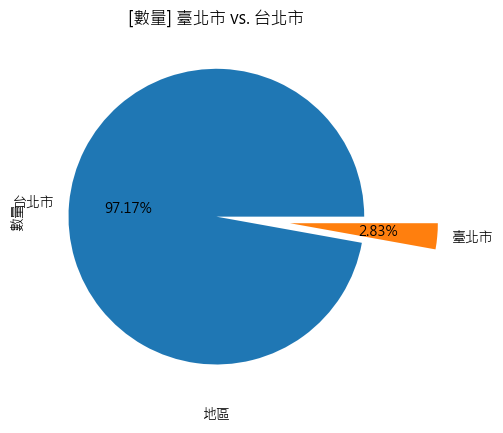

In [48]:
'''畫個圖吧'''
plt.pie(
    df.value_counts('note').values, 
    labels=df.value_counts('note').index,
    explode=(0, 0.5),
    autopct="%.2f%%"
)
plt.title("[數量] 臺北市 vs. 台北市")
plt.xlabel("地區")
plt.ylabel("數量")
plt.show()